<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

## 1 Comparing the two ‘dialects’

### 1.1 Some nomenclature

one figure can have multiple axis 

### 1.2 We need some data.

In [2]:
x = np.linspace(-np.pi, np.pi, 100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### 1.3 Here comes the comparison

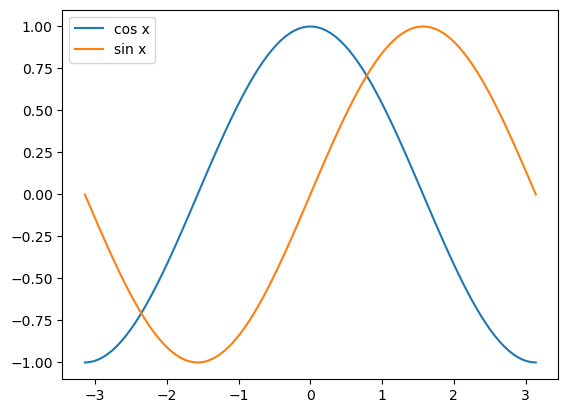

In [6]:
from matplotlib import pyplot as plt
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
plt.show()

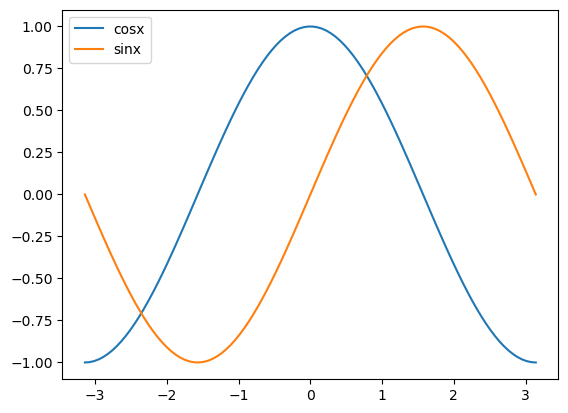

module

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.plot(x, cos_x, label = 'cosx')
ax.plot(x, sin_x, label = 'sinx')
ax.legend()
plt.show()
type(plt)

## 2 Using the OO Interface

### 2.1 Getting ax

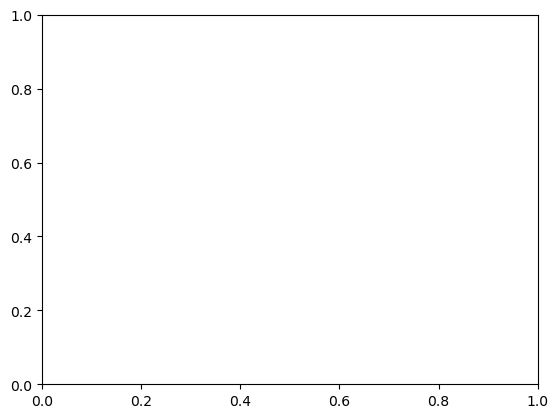

In [16]:
fig, ax_test = plt.subplots(ncols = 1, nrows = 1)

In [17]:
type(ax_test)

matplotlib.axes._subplots.AxesSubplot

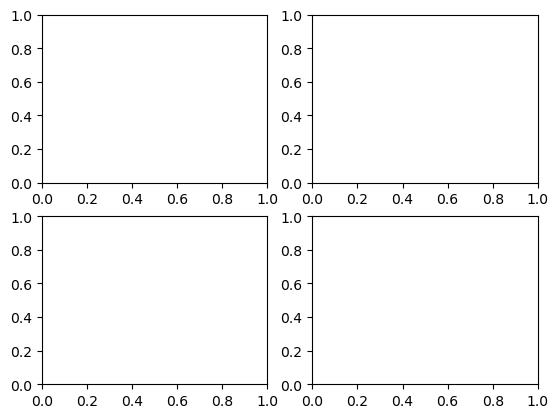

In [67]:
fig, ax = plt.subplots(ncols = 2, nrows = 2)

### 2.2 What is ax

In [31]:
type(ax[0, 1])
ax.shape

(2, 2)

### 2.3 Plots in a column

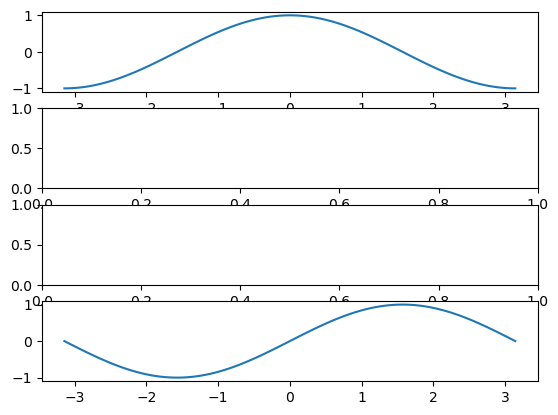

In [72]:
fig, ax = plt.subplots(ncols = 1, nrows = 4)
x = np.linspace(-np.pi, np.pi, 100)
cos_x = np.cos(x)
sin_x = np.sin(x)
ax[0].plot(x, cos_x, label = 'cos x')
ax[3].plot(x, sin_x, label = 'sin x')
plt.show()

### 2.4 Legends

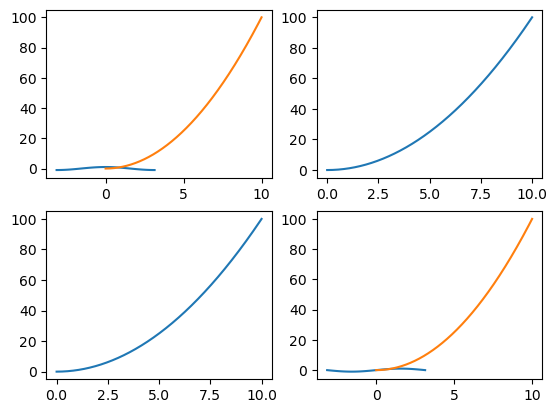

In [80]:
fig, ax = plt.subplots(ncols = 2, nrows = 2)
x = np.linspace(-np.pi, np.pi, 100)
cos_x = np.cos(x)
sin_x = np.sin(x)
ax[0,0].plot(x, cos_x, label = 'cos x')
ax[1,1].plot(x, sin_x, label = 'sin x')
for i in range(2):
    for j in range(2):
        ax[i][j].plot(np.linspace(0, 10, 1000), np.linspace(0, 10, 1000)**2)

In [61]:
#ax[0,0].legend()
#ax[1,1].legend()
type(plt)
#plt.show()
#fig
plt.show()

for i in range(2):
    for j in range(2):
        ax[i][j].plot()


### 2.5 Tweaks

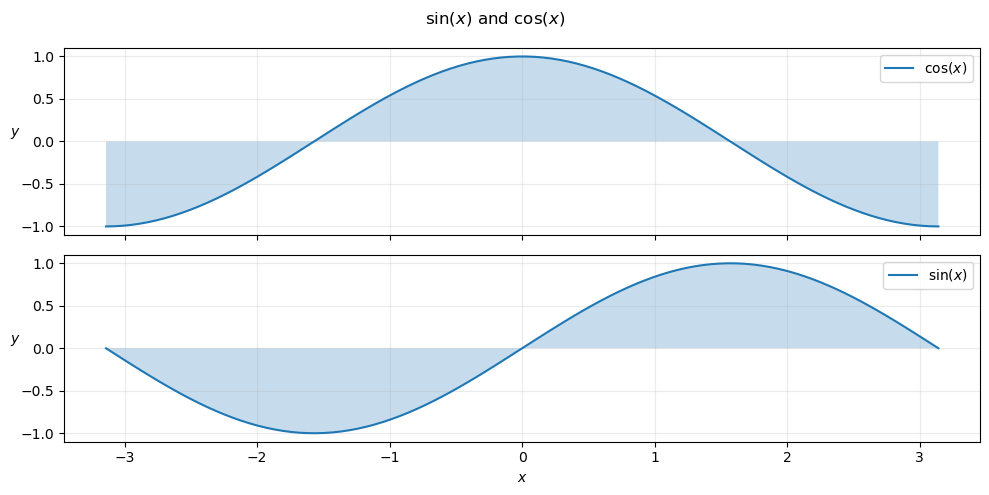

In [14]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(10, 5),   # 10 x 5 inches!
                       sharex=True)
ax[1].set_xlabel('$x$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[0].plot(x, cos_x, label = r'$\cos(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)
fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()
plt.show()

## 3 More rows and columns

### 3.1 Using ax

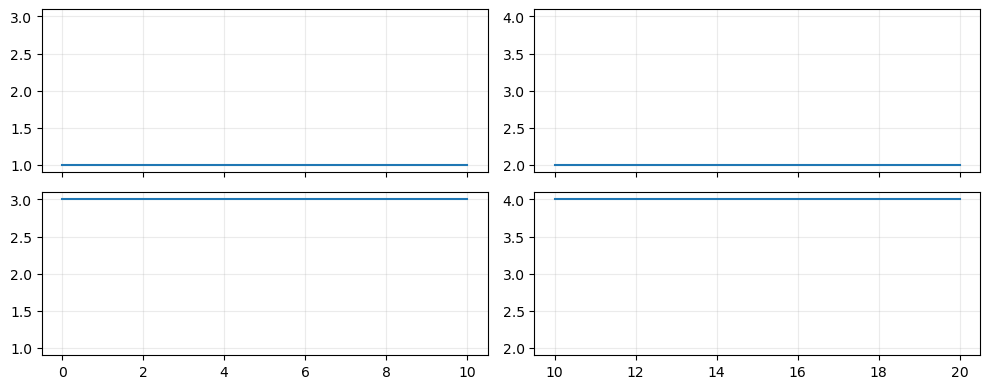

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# x data for plotting
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(10, 20, 100)

top_left.plot(x1, np.ones_like(x1))
top_right.plot(x2, 2*np.ones_like(x2))
bottom_left.plot(x1, 3*np.ones_like(x1))
bottom_right.plot(x2, 4**np.ones_like(x2))

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()
plt.show()

In [16]:
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))

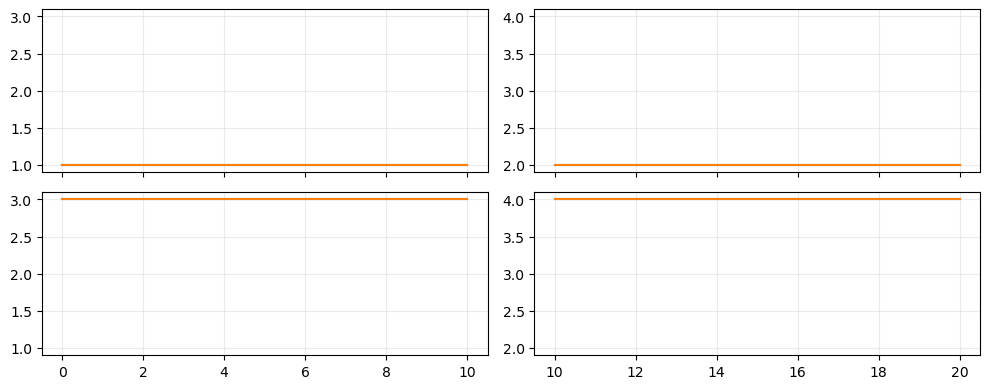

In [25]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]
top_left, top_right, bottom_left, bottom_right = ax.flatten()
fig

### 3.2 Sharing axes

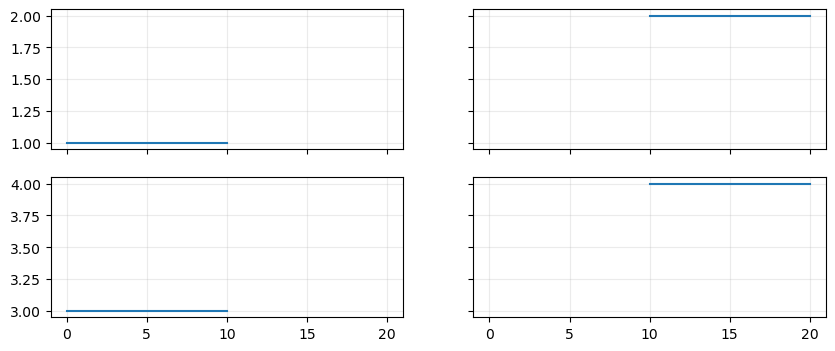

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(10, 4),
                       sharex=True, sharey='row')
ax[0, 0].plot(x1, np.ones_like(x1))
ax[0, 1].plot(x2, 2*np.ones_like(x2))
ax[1, 0].plot(x1, 3*np.ones_like(x1))
ax[1, 1].plot(x2, 4**np.ones_like(x2))
for a in ax.flatten():
    a.grid(alpha=.25)

### 3.3 Accessing all axes

In [30]:
for a in ax.flatten():
    a.grid(alpha=.25)

## 4 Other useful plots

### 4.1 Histograms

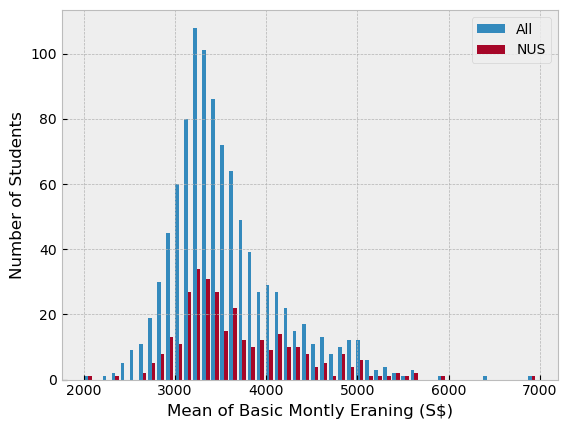

In [2]:
from matplotlib import pyplot as plt
data = {}

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data['All'] = np.loadtxt(filename, skiprows=1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data['NUS'] = np.loadtxt(filename, skiprows=1)

plt.style.use('bmh')

plt.hist([data['All'], data['NUS']],
         bins=50,                        # How many bins to split the data
         label=['All', 'NUS']
         )
plt.xlabel('Mean of Basic Montly Eraning (S$)')
plt.ylabel('Number of Students')
plt.legend()
plt.show()


### 4.2 Scatter plots

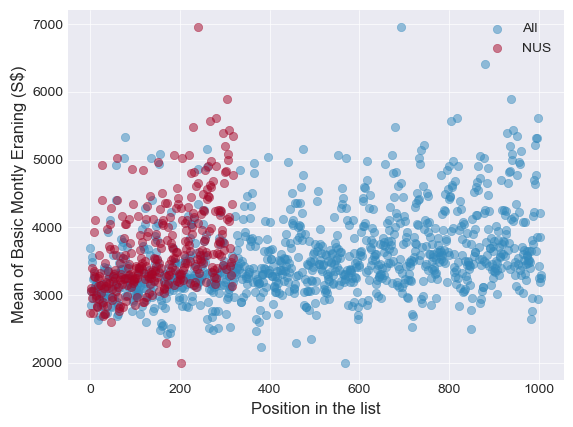

In [4]:
data = {}
for label in ['All', 'NUS']:
    filename = f'sg-gov-graduate-employment-survey_basic_monthly_mean_{label.lower()}.csv'
    data[label] = np.loadtxt(filename, skiprows=1)

plt.style.use('seaborn-v0_8-darkgrid')

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()
plt.show()

### 4.3 Bar charts

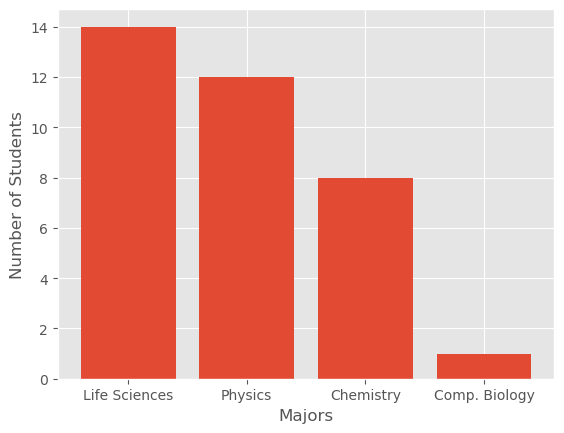

In [31]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

plt.show()

### 4.4 Pie charts

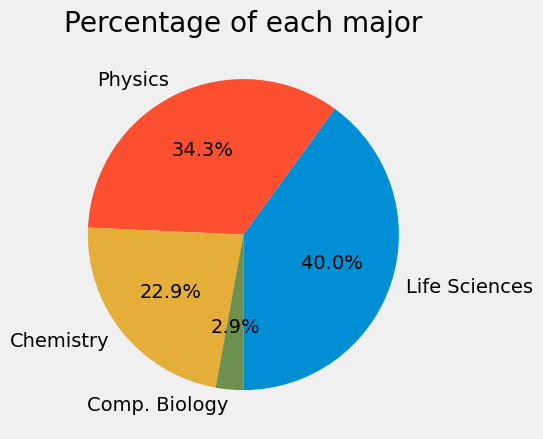

In [32]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')
plt.show()

## Exercise 1 :  Plotting data from files

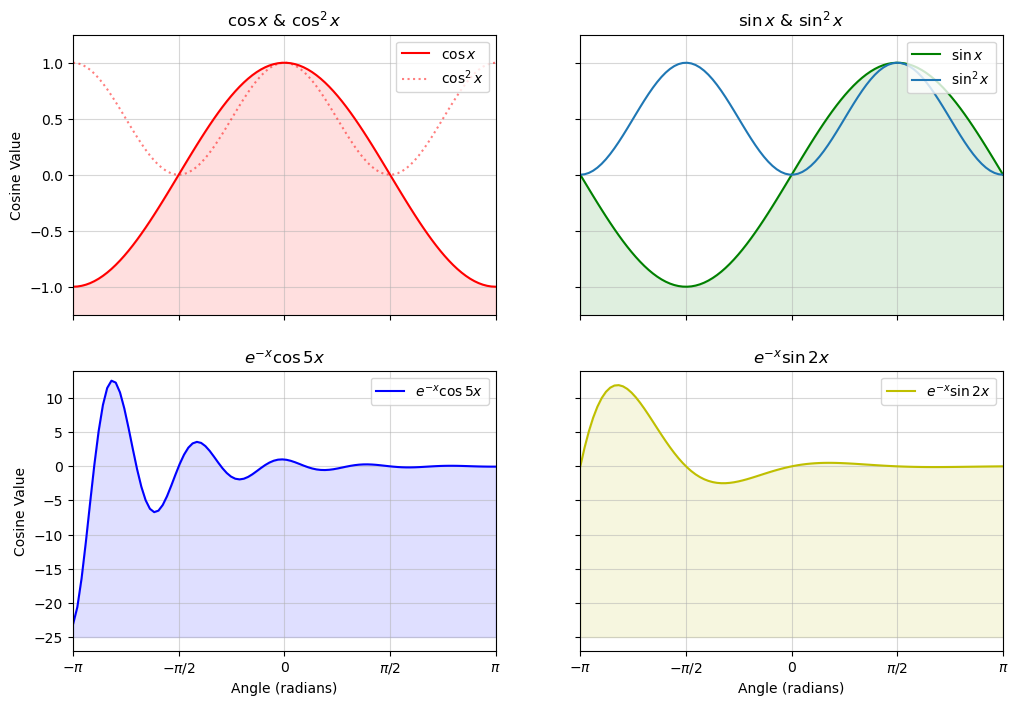

In [21]:
plt.style.use('default')
#--------- Generate cosine and sine values --------#
x = np.linspace(-np.pi, np.pi, num=100, endpoint=True)
cos_x = np.cos(x)
sin_x = np.sin(x)
fun1_x = np.exp(-x) * np.cos(5 * x)
fun2_x = np.exp(-x) * np.sin(2 * x)

#------- Plot the data -------#
fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(12, 8),  sharey='row', sharex = True)

#------- Subplot 1 -------#
axes[0, 0].plot(x, cos_x, color='r', label='$\cos x$')
axes[0, 0].plot(x, cos_x**2, color='r',
                linestyle=':', label='$\cos^2 x$', alpha = .5)
axes[0, 0].set_title('$\cos x$ & $\cos^2x$')
axes[0, 0].set_ylabel('Cosine Value')
axes[0, 0].set_xlim(-np.pi, np.pi)
axes[0, 0].fill_between(x, cos_x, -2, color='r', alpha=.125)
axes[0, 0].legend(loc='upper right')

#------- Subplot 2 -------#
axes[0, 1].plot(x, sin_x, color='g', label='$\sin x$')
axes[0, 1].fill_between(x, sin_x, -2, color='g', alpha=.125)
axes[0, 1].plot(x, sin_x**2, label='$\sin^2 x$')
axes[0, 1].set_title('$\sin x$ & $\sin^2x$')
axes[0, 1].set_ylim(-1.25, 1.25)
axes[0, 1].legend(loc='upper right')

#------- Subplot 3 -------#
axes[1, 0].plot(x, fun1_x, color='b', label='$e^{-x}\cos 5x$')
axes[1, 0].fill_between(x, fun1_x, -25, color='b', alpha=.125)
axes[1, 0].set_title('$e^{-x}\cos 5x$')
axes[1, 0].set_xlabel('Angle (radians)')
axes[1, 0].set_ylabel('Cosine Value')
axes[1, 0].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 0].set_ylim(-27, 14)
axes[1, 0].set_xticklabels(['$-\pi$', '$-\pi/2$', '0', '$\pi/2$', '$\pi$'])
axes[1, 0].legend()

#------- Subplot 4 -------#
axes[1, 1].plot(x, fun2_x, color='y', label='$e^{-x}\sin 2x$')
axes[1, 1].set_title('$e^{-x}\sin 2x$')
axes[1, 1].set_xlabel('Angle (radians)')
axes[1, 1].fill_between(x, fun2_x, -25, color='y', alpha=.125)
axes[1, 1].set_xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi])
axes[1, 1].legend()

# 'flatten', 'opens' the 2D array into a simple 1D array
for a in axes.flatten():
    a.grid(alpha=.5)

# plt.tight_layout()
plt.show()